In [1]:
%pylab inline
from scipy.io import loadmat
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve, validation_curve, PredefinedSplit, GridSearchCV

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = loadmat('ex5data1.mat')
X = np.ascontiguousarray(data['X']) # (12,1)
y = np.ascontiguousarray(data['y']) # (12,1)
Xval = np.ascontiguousarray(data['Xval']) # (21,1)
yval = np.ascontiguousarray(data['yval']) # (21,1)
Xtest = np.ascontiguousarray(data['Xtest']) # (21,1)
ytest = np.ascontiguousarray(data['ytest']) # (21,1)

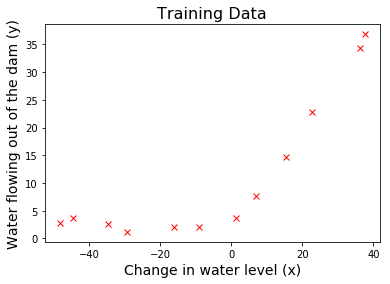

In [3]:
plt.plot(X,y,'rx')

plt.xlabel('Change in water level (x)',fontsize=14)
plt.ylabel('Water flowing out of the dam (y)',fontsize=14)
plt.title('Training Data',fontsize=16);

### Stochastic Gradient Descent Linear Regression

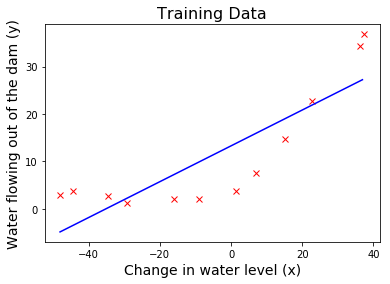

In [4]:
reg = SGDRegressor(max_iter=1e6 / len(y),
                   penalty='none')
reg.fit(X,y.ravel())

X_fit = np.arange(X.min(),X.max(),1).reshape((-1,1))
y_fit = reg.predict(X_fit)

plt.plot(X,y,'rx')
plt.plot(X_fit, y_fit, 'b-')
plt.xlabel('Change in water level (x)',fontsize=14)
plt.ylabel('Water flowing out of the dam (y)',fontsize=14)
plt.title('Training Data',fontsize=16);

### Learning Curves

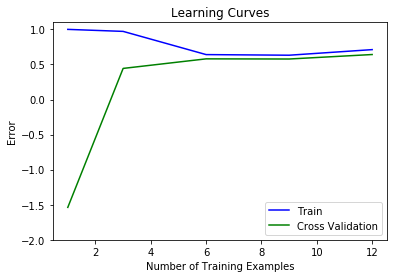

In [5]:
Xstack = np.vstack([X,Xval])
ystack = np.vstack([y,yval])

reg = SGDRegressor(max_iter=1e6 / len(ystack),
                   penalty='none')

split = PredefinedSplit(np.concatenate([full(len(X),-1), full(len(Xval),0)]))
abs, train_scores, cv_scores = learning_curve(reg,
                                              Xstack,
                                              ystack.ravel(),
                                              #scoring='neg_mean_squared_error',
                                              cv=split)

plt.plot(abs,train_scores,'b-',label='Train')
plt.plot(abs,cv_scores,'g-',label='Cross Validation')
plt.xlabel('Number of Training Examples')
plt.ylabel('Error')
plt.ylim([-2,1.1])
plt.legend()
plt.title('Learning Curves');

### Validation Curves

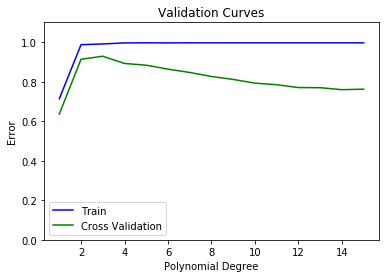

In [6]:
pipe = make_pipeline(PolynomialFeatures(include_bias=False),
                     StandardScaler(),
                    SGDRegressor(max_iter=1e6 / len(ystack),
                                 penalty='none'))

param_range = range(1,16)
train_scores, cv_scores = validation_curve(pipe,
                 Xstack,
                 ystack.ravel(),
                 param_name='polynomialfeatures__degree',
                 param_range=param_range,
                 #scoring='neg_mean_squared_error',
                 cv=split)

plt.plot(param_range,train_scores,'b-',label='Train')
plt.plot(param_range,cv_scores,'g-',label='Cross Validation')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.ylim([0,1.1])
plt.legend()
plt.title('Validation Curves');

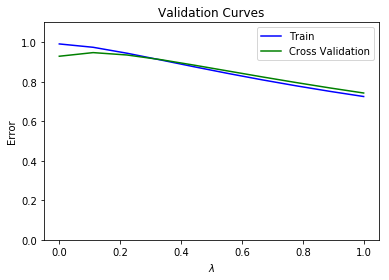

In [7]:
pipe = make_pipeline(PolynomialFeatures(degree=3,
                                        include_bias=False),
                     StandardScaler(),
                    SGDRegressor(max_iter=1e6 / len(ystack)))

param_range = np.linspace(0,1,10)
train_scores, cv_scores = validation_curve(pipe,
                 Xstack,
                 ystack.ravel(),
                 param_name='sgdregressor__alpha',
                 param_range=param_range,
                 #scoring='neg_mean_squared_error',
                 cv=split)

plt.plot(param_range,train_scores,'b-',label='Train')
plt.plot(param_range,cv_scores,'g-',label='Cross Validation')
plt.xlabel('$\lambda$')
plt.ylabel('Error')
plt.ylim([0,1.1])
plt.legend()
plt.title('Validation Curves');

### Grid Search

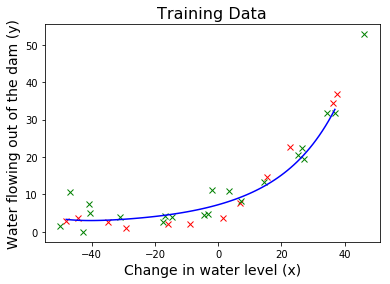

In [8]:
pipe = make_pipeline(PolynomialFeatures(include_bias=False),
                     StandardScaler(),
                     SGDRegressor(max_iter=1e6 / len(ystack)))

gs = GridSearchCV(pipe, {
    'polynomialfeatures__degree': range(1,16),
    'sgdregressor__alpha': np.linspace(0,1,10)
}, cv=split)
gs.fit(Xstack, ystack.ravel())

pipe.set_params(**gs.best_params_)
pipe.fit(X,y.ravel())

X_fit = np.arange(X.min(),X.max(),1).reshape((-1,1))
y_fit = pipe.predict(X_fit)

plt.plot(X,y,'rx')
plt.plot(Xval,yval,'gx')
plt.plot(X_fit, y_fit, 'b-')
plt.xlabel('Change in water level (x)',fontsize=14)
plt.ylabel('Water flowing out of the dam (y)',fontsize=14)
plt.title('Training Data',fontsize=16);